In [101]:
import itk
import vtk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

# 1) Données

In [102]:
scan1 = itk.imread('Data/case6_gre1.nrrd', pixel_type=itk.F)
scan2 = itk.imread('Data/case6_gre2.nrrd', pixel_type=itk.F)

# 2) Recalage d'images

# 3) Segmentation des tumeurs

In [103]:
seedX = 100
seedY = 97
lower = 283
upper = 1400
slice_index = 79
dimension = 3

# Add a bit of noise to find close tumors
smoother = itk.GradientAnisotropicDiffusionImageFilter.New(
    Input=scan2,
    NumberOfIterations=20,
    TimeStep=0.04,
    ConductanceParameter=3
)
smoother.Update()

# Segment the image
connected_threshold = itk.ConnectedThresholdImageFilter.New(smoother.GetOutput()) #scan2
connected_threshold.SetReplaceValue(1374)
connected_threshold.SetLower(lower)
connected_threshold.SetUpper(upper)
connected_threshold.SetSeed((seedX, seedY, slice_index))
connected_threshold.Update()

# Convert the pixel type to unsigned char (UC)
in_type = type(connected_threshold.GetOutput())
out_type = itk.Image[itk.UC, dimension]
cast_filter = itk.CastImageFilter[in_type, out_type].New()
cast_filter.SetInput(connected_threshold.GetOutput())
cast_filter.Update()
segmented_image = cast_filter.GetOutput()

# Convert the segmented image to a NumPy array for visualization
segmented_np = itk.array_view_from_image(segmented_image)

# Rescale the intensity values for easier visualization
rescaler = itk.RescaleIntensityImageFilter[out_type, out_type].New()
rescaler.SetInput(segmented_image)
rescaler.SetOutputMinimum(0)
rescaler.SetOutputMaximum(255)
rescaler.Update()
segmented_image_rescaled = rescaler.GetOutput()
segmented_np_rescaled = itk.array_view_from_image(segmented_image_rescaled)

# Save the image
itk.imwrite(segmented_image_rescaled, 'Data/segmented_image.nrrd')

# 4) Analyse et visualisation des changements

Vous pouvez choisir la slice a afficher en modifiant la variable `index`. <br> Le scan de base est a gauche, la segmentation est a droite.

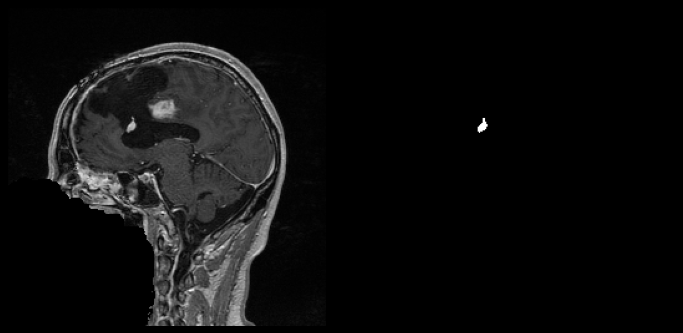

In [106]:
index = 79

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
axs[0].imshow(scan2[index], cmap='gray')
axs[0].axis('off')

axs[1].imshow(segmented_image_rescaled[index], cmap='gray')
axs[1].axis('off')

plt.subplots_adjust(wspace=0.1)
plt.show()